# HTM Results Analysis

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load in results
df = pd.read_csv('results.csv', index_col=0)

c:\users\ruben\anaconda3\envs\htm\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [92]:
df


,test_label,overlap_score,train_label
0,0,6,1
1,0,5,0
2,0,0,0
3,0,16,0
4,0,55,0
...,...,...,...
2251495,1,63,0
2251496,1,26,0
2251497,1,9,0
2251498,1,21,0


In [4]:
df.describe()

,test_label,overlap_score,train_label
count,2.251500e+06,2.251500e+06,2.251500e+06
mean,4.397069e-01,2.945274e+01,4.933333e-01
std,1.146728e+00,3.184177e+01,1.280868e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,6.000000e+00,0.000000e+00
50%,0.000000e+00,1.800000e+01,0.000000e+00
75%,0.000000e+00,4.300000e+01,0.000000e+00
max,8.000000e+00,1.990000e+02,8.000000e+00


In [51]:
df_results = df.groupby(['test_label','train_label']).mean().reset_index('test_label').reset_index()
categories = dict({0:'background',1:'person_enters',2:'person_exits'
                  ,3:'person_enters_vehicle',4:'person_exists_vehicle',5:'person_sits_down',6:'person_stands_up',
                  7:'vehicle_starts',8:'vehicle_stops'})

df_results.test_label = df_results.test_label.replace(categories)
df_results.train_label = df_results.train_label.replace(categories)


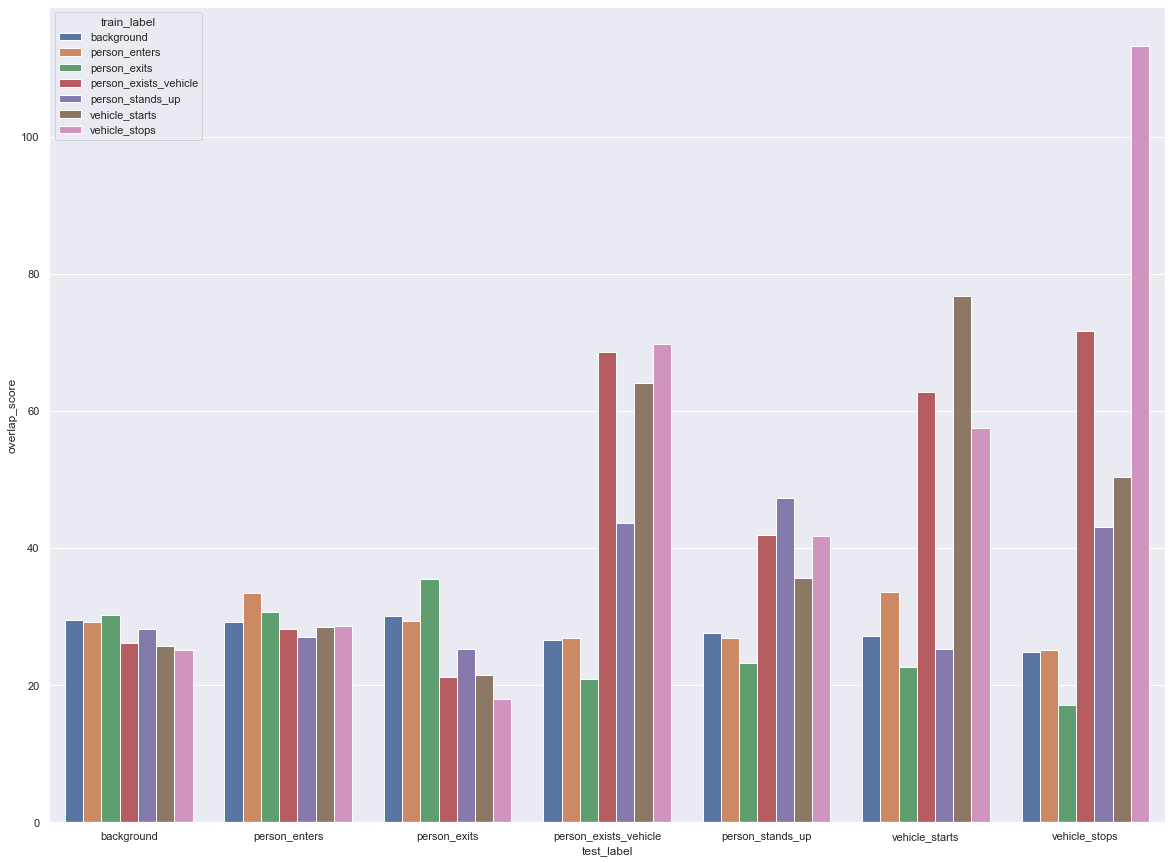

In [54]:
ax = sns.barplot(x="test_label", y="overlap_score", hue='train_label', data=df_results)
sns.set(rc={'figure.figsize':(20, 20)})

In [85]:
values = df_results.overlap_score.values
values = np.reshape(values,(7,7))

index= df_results.groupby(['train_label']).mean().index.values
cols = df_results.groupby(['test_label']).mean().index.values

In [87]:
df_heatmap = pd.DataFrame(values, index=index, columns=cols)
df_heatmap.style.background_gradient(cmap='Blues')

,background,person_enters,person_exists_vehicle,person_exits,person_stands_up,vehicle_starts,vehicle_stops
background,29.476866,29.272398,30.187677,26.146465,28.128746,25.784665,25.172100
person_enters,29.258753,33.428844,30.712402,28.215274,27.015108,28.466318,28.676259
person_exists_vehicle,30.087919,29.392269,35.551926,21.217054,25.344186,21.463002,18.005638
person_exits,26.648830,26.943709,20.966270,68.557692,43.662500,64.053030,69.719697
person_stands_up,27.541310,26.884437,23.303968,41.942308,47.270000,35.636364,41.718182
vehicle_starts,27.145738,33.592347,22.640212,62.777778,25.338889,76.797980,57.545455
vehicle_stops,24.883134,25.127483,17.156746,71.673077,43.100000,50.431818,113.295455


In [91]:
from statsmodels.stats.weightstats import ttest_ind

df

,test_label,overlap_score,train_label
0,0,6,1
1,0,5,0
2,0,0,0
3,0,16,0
4,0,55,0
...,...,...,...
2251495,1,63,0
2251496,1,26,0
2251497,1,9,0
2251498,1,21,0
